# Python & SQL ecommerce

In [73]:
!pip install pymysql pandas

     -------------------------------------- 45.0/45.0 kB 373.5 kB/s eta 0:00:00


In [82]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [86]:
import pandas as pd
import mysql.connector
import os


In [87]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os

In [10]:
# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('geolocation.csv', 'geolocation'),
    ("payments.csv","payments")# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='1234',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/HP/Downloads/ML Own Complete/SQL project'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [ ]:
# Lets start from here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import os

db=mysql.connector.connect(host="localhost",
                          username="root",
                          password="1234",
                          database="ecommerce")

cur=db.cursor()

# 1. List all unique cities where customers are located.

In [109]:
query="""select distinct customer_city from customers"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["city"])
df

,city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# 2. Count the number of orders placed in 2017.

In [95]:
query="""select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data=cur.fetchall()

"total order placed in 2017",data

# "total order placed in 2017",data    # # :-use this to show in proper numerical formate

('total order placed in 2017', [(90202,)])

<!-- 3.  Find the total sales per category.  -->

# 3. Find the total sales per category.


In [96]:
query = """select (products.product_category) category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category
"""
cur.execute(query)

data=cur.fetchall()

data

[('perfumery', 1013477.32),
 ('Furniture Decoration', 2860352.78),
 ('telephony', 973764.1),
 ('Fashion Bags and Accessories', 436316.56),
 ('bed table bath', 3425107.34),
 ('automotive', 1704588.66),
 ('computer accessories', 3170660.89),
 ('housewares', 2189516.26),
 ('babies', 1079691.32),
 ('toys', 1238075.38),
 ('Furniture office', 1293652.97),
 ('Cool Stuff', 1559396.0),
 ('HEALTH BEAUTY', 3314746.24),
 ('pet Shop', 622537.94),
 ('General Interest Books', 129389.52),
 ('stationary store', 634880.14),
 ('Watches present', 2858433.36),
 ('PCs', 558243.1),
 ('climatization', 182341.32),
 ('Construction Tools Construction', 482951.26),
 ('sport leisure', 2784255.12),
 ('Bags Accessories', 374302.58),
 ('electronics', 519714.2),
 ('Casa Construcao', 273290.58),
 ('Games consoles', 390960.76),
 ('home appliances', 191064.54),
 ('Garden tools', 1676561.5),
 ('Agro Industria e Comercio', 237461.22),
 (None, 505603.42),
 ('audio', 120649.24),
 ('technical books', 49830.88),
 ('Constructio

In [113]:
# If you want to convert into dataframe
df=pd.DataFrame(data,columns=["Category","Sales"])
df.head()

,Category,Sales
0,SP,83492
1,RJ,25704
2,MG,23270
3,RS,10932
4,PR,10090


# 4. Calculate the percentage of orders that were paid in installments.

In [98]:
query= """select (sum(case when payment_installments >=1 then 1
else 0 end))/ count(*)*100 from payments"""

cur.execute(query)

data=cur.fetchall()

"the percentage of orders that were paid in installments" ,data[0]

('the percentage of orders that were paid in installments',
 (Decimal('99.9981'),))

# 5. Count the number of customers from each state.

  state  customer_count
0    SP           83492
1    RJ           25704
2    MG           23270
3    RS           10932
4    PR           10090


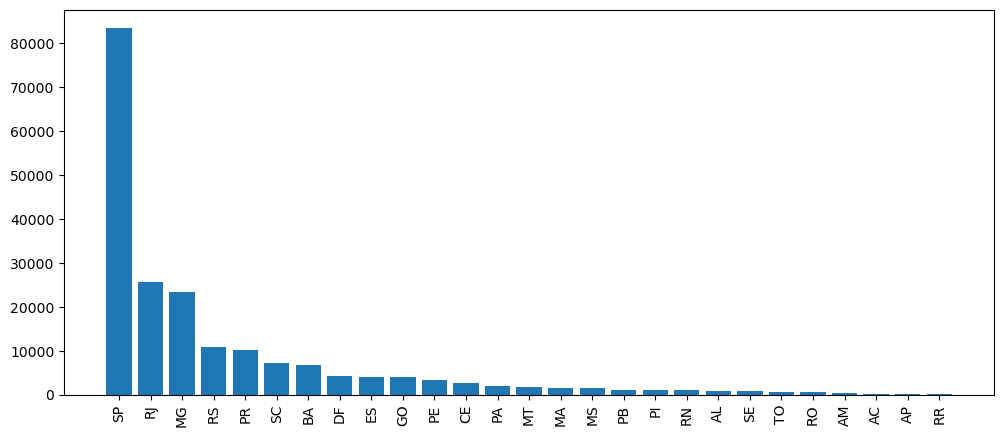

In [112]:
query= """select customer_state ,count(customer_unique_id)
from customers group by customer_state
order by count(customer_unique_id) desc"""

cur.execute(query)

data=cur.fetchall()
# Convert into dataframe
df=pd.DataFrame(data, columns=["state","customer_count"])
print(df.head())
# plot graphs
plt.figure(figsize=(12,5))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()

# 6. Calculate the number of orders per month in 2018.


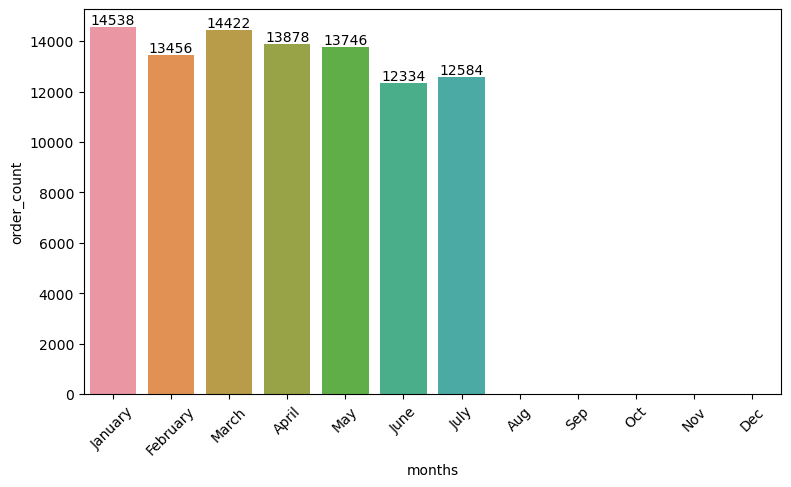

In [140]:
query="""select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months
order by count(order_id) desc """

cur.execute(query)
data=cur.fetchall()

data
# Convert dataframe
df=pd.DataFrame(data,columns=["months","order_count"])
o=["January","February","March","April","May","June","July","Aug","Sep","Oct","Nov","Dec"]
# plot figure
plt.figure(figsize=(9,5))
ax=sns.barplot(x=df["months"],y=df["order_count"],data=df ,order=o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

# 7. Find the average number of products per order, grouped by customer city.


In [152]:
query="""with count_per_order as
(select orders.order_id, orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data=cur.fetchall()

# datafram
df=pd.DataFrame(data,columns=["customer_city","average_orders"])
df.head(10)

,customer_city,average_orders
0,padre carvalho,14.00
1,celso ramos,13.00
2,datas,12.00
3,candido godoi,12.00
4,matias olimpio,10.00
5,cidelandia,8.00
6,curralinho,8.00
7,picarra,8.00
8,morro de sao paulo,8.00
9,teixeira soares,8.00


# 8. Calculate the percentage of total revenue contributed by each product category.


In [159]:
query="""select upper(products.product_category) category ,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id=order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category order by sales_percentage desc
"""
cur.execute(query)
data=cur.fetchall()
data

# covert into dataframe

df=pd.DataFrame(data,columns=["category","sales_percentage"])
df

,category,sales_percentage
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86
...,...,...
69,PC GAMER,0.03
70,HOUSE COMFORT 2,0.02
71,CDS MUSIC DVDS,0.01
72,FASHION CHILDREN'S CLOTHING,0.01


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [12]:
query="""select products.product_category,
count(order_items.product_id) No_of_purchase,
round(avg(order_items.price),2)Price
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category"""

cur.execute(query)
data=cur.fetchall()
data

# Convert in to dataframe
df=pd.DataFrame(data,columns=["Category","Order_Count","Price"])
df

ar1=df["Order_Count"]
ar2=df["Price"]

# Correlation
import numpy as np
corr = np.corrcoef([ar1,ar2])
print(corr)
print("The correlation b/w product price and the number of times a product has been purchased.",corr[0][1])

[[ 1.         -0.10631514]
 [-0.10631514  1.        ]]
The correlation b/w product price and the number of times a product has been purchased. -0.10631514167157562


<Axes: xlabel='Order_Count', ylabel='Price'>

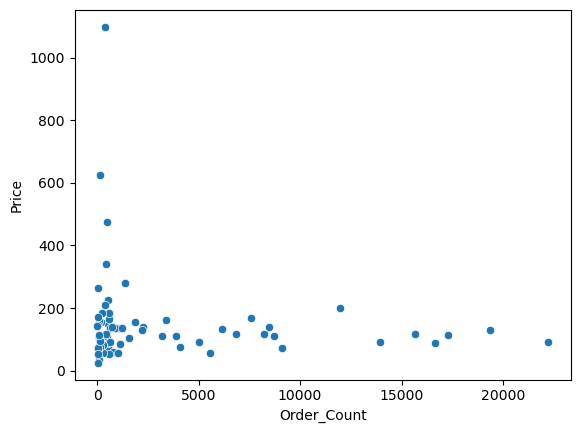

In [26]:
sns.scatterplot(x="Order_Count",y="Price",data=df)

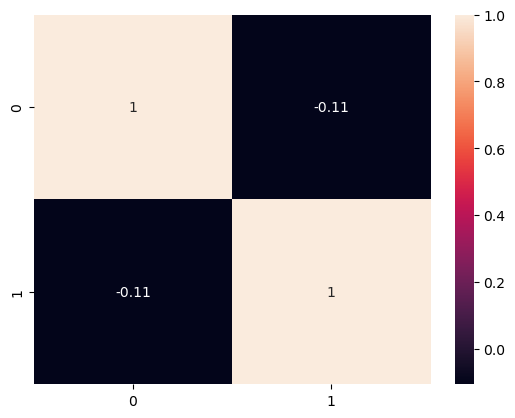

In [28]:
sns.heatmap(corr,annot=True)
plt.show()

# 10. Calculate the total revenue generated by each seller, and rank them by revenue.


In [40]:
query="""select *, dense_rank() over(order by revenue desc) as rn from
 (select order_items.seller_id , sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a;"""

cur.execute(query)
data=cur.fetchall()
data

df=pd.DataFrame(data,columns=["Seller_id","Revenue","Rank"])
df
df1=df.head(5)

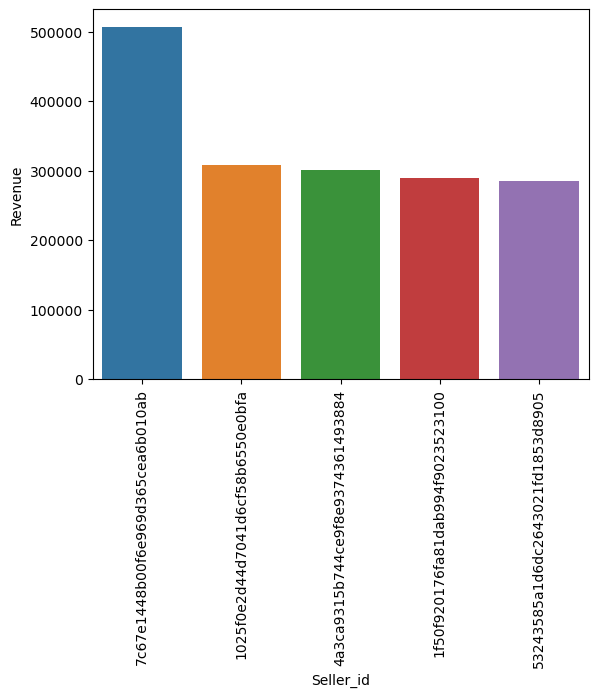

In [50]:
# PLot graph
sns.barplot(x="Seller_id",y="Revenue",data=df1)
plt.xticks(rotation=90)
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.


In [52]:
query="""select customer_id,order_purchase_timestamp,payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg 
from
(select orders.customer_id , orders.order_purchase_timestamp ,
payments.payment_value as payment from payments 
join orders on payments.order_id=orders.order_id )as a"""

cur.execute(query)

data=cur.fetchall()
data

df=pd.DataFrame(data,columns=["Customer_d","Order_date","Price","Moving_avg"])
df

,Customer_d,Order_date,Price,Moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
...,...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# 12. Calculate the cumulative sales per month for each year.


In [57]:
query="""select years,months,payment,sum(payment)
over (order by years,months) cumulative_sum from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments 
on orders.order_id = payments.order_id
group by years, months order by years,months) as a"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["Years","Months","Sales","Cumulative_Sales"])
df

,Years,Months,Sales,Cumulative_Sales
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


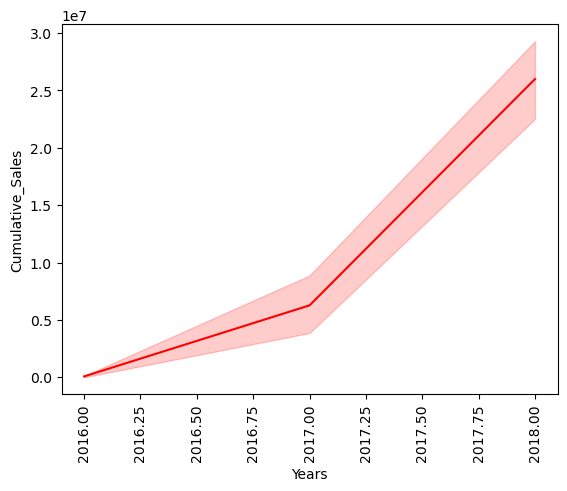

In [92]:
# Plot line chart
sns.lineplot(x=df["Years"],y=df["Cumulative_Sales"],data=df,color="red")
plt.xticks(rotation=90)
plt.show()

# 13. Calculate the year-over-year growth rate of total sales.


In [99]:
query="""with a as(
select year(orders.order_purchase_timestamp) as years,
sum(payments.payment_value) as payment
from orders join payments
on orders.order_id=payments.order_id group by years)
select years,((payment - lag(payment , 1) over (order by years))/
lag(payment, 1) over (order by years)) * 100 from a """

cur.execute(query)

data=cur.fetchall()

data

df=pd.DataFrame(data,columns=["Years","yoy_%_growth"])
df

,Years,yoy_%_growth
0,2016,NaN
1,2017,12112.703760
2,2018,20.000924


<Axes: xlabel='Years', ylabel='yoy_%_growth'>

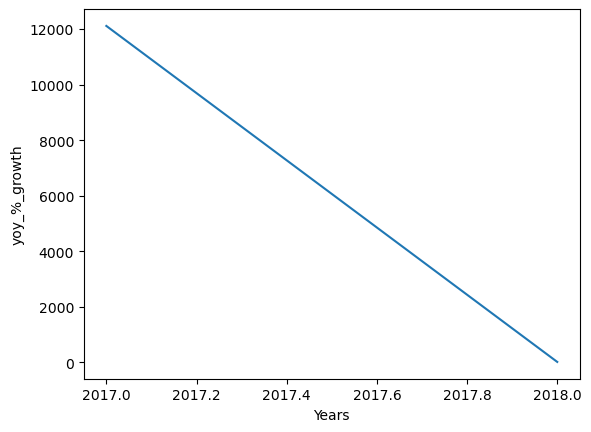

In [100]:
sns.lineplot(x="Years",y="yoy_%_growth",data=df)

# 14. Identify the top 3 customers who spent the most money in each year.

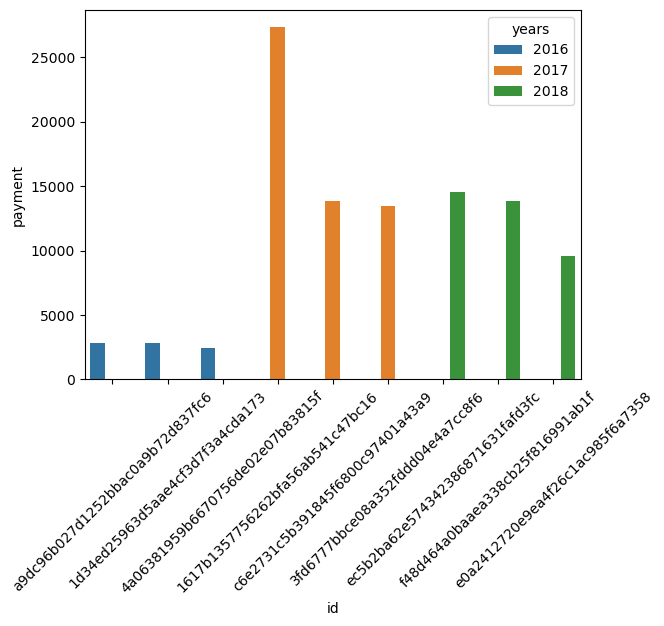

In [106]:
query="""select years ,customer_id, payment , d_rank
from
(select year(orders.order_purchase_timestamp) years,orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc ) d_rank
from orders join payments
on payments.order_id =orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <=3"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["years","id","payment","rank"])
sns.barplot(x="id",y="payment",hue="years",data=df)
plt.xticks(rotation=45)
plt.show()